In [1]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', 'C:\\Users\\seanm\\Anaconda3\\python35.zip', 'C:\\Users\\seanm\\Anaconda3\\DLLs', 'C:\\Users\\seanm\\Anaconda3\\lib', 'C:\\Users\\seanm\\Anaconda3', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\seanm\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\seanm\\.ipython', 'C:\\Users\\seanm\\OneDrive\\Documents\\Research\\BasicTauSolver\\GillesPy2']


In [3]:
import math
import gillespy2
from gillespy2.basic_tau_leaping_solver import BasicTauLeapingSolver
from gillespy2.basic_ssa_solver import BasicSSASolver

In [4]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [5]:
model = MichaelisMenten()

In [6]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True, profile=True, debug=False)
# %time results2 = model.run(solver=BasicSSASolver(), show_labels=True)
# import cProfile

# cProfile.run('model.run(solver=BasicTauLeapingSolver(), show_labels=True)', sort='tot')

[0.003750487672060498, 0.0037946110564376794, 0.0037946110564376794, 0.0038395673350384092, 0.0038395673350384092, 0.0038395673350384092, 0.019634171797835064, 0.019698996318653853, 0.019764233639602263, 0.01989596069196924, 0.019962457482518448, 0.020232749699399147, 0.020301417047585743, 0.020370529381604458, 0.020370529381604458, 0.020440090359752205, 0.020510103651610732, 0.020580572936253164, 0.020933640360058615, 0.021220609455903577, 0.021220609455903577, 0.021513981936860764, 0.021813961808115668, 0.021813961808115668, 0.0224346031318706, 0.0224346031318706, 0.023084345581887097, 0.023084345581887097, 0.0224346031318706, 0.0224346031318706, 0.023084345581887097, 0.023765162173466674, 0.02447920491542435, 0.024849412559887086, 0.02601659858990036, 0.02642566460546483, 0.026114774433635832, 0.02652576181987947, 0.02652576181987947, 0.02782438362034185, 0.02782438362034185, 0.02828054298642534, 0.02828054298642534, 0.028749097997050346, 0.02828054298642534, 0.02828054298642534, 0.

In [7]:
# cProfile.run('model.run(solver=BasicSSASolver(), show_labels=True, debug=False)', sort='tot')
%time results2 = model.run(solver=BasicSSASolver(), show_labels=True, profile=True, debug=False)

[0.005962948521645567, 0.01577371716851936, 0.007393362153427829, 0.005972668190451149, 0.004883428280430761, 0.04909960996851689, 0.02598413013450042, 0.02224391195138298, 0.022378934378613193, 0.00885169812563957, 0.0033433128896363812, 0.019289470444622824, 0.03782025453211806, 0.001660734156045582, 0.013491705326812813, 0.04815873322063118, 0.02127381323593436, 0.0010908581924329698, 0.011871465297799436, 0.029455102245631984, 0.00414107296056477, 0.008306819375710529, 0.019333709114323788, 0.008480951917125501, 0.0023475630856238006, 0.0003277284975554849, 0.0014191464947039597, 0.022751779881517033, 0.005638531153273187, 0.009446860058820663, 0.0035541091111272955, 0.009433870976535341, 0.058414913383686984, 0.005542781606711166, 0.029693465220938044, 0.0063228346496437835, 0.040560373231218604, 0.0054256211982300915, 0.0064056464137280346, 0.001617030341941813, 0.05180662143347553, 0.044168404821883424, 0.06896520236022742, 0.0008883814112172993, 0.022616268887981128, 0.02924625

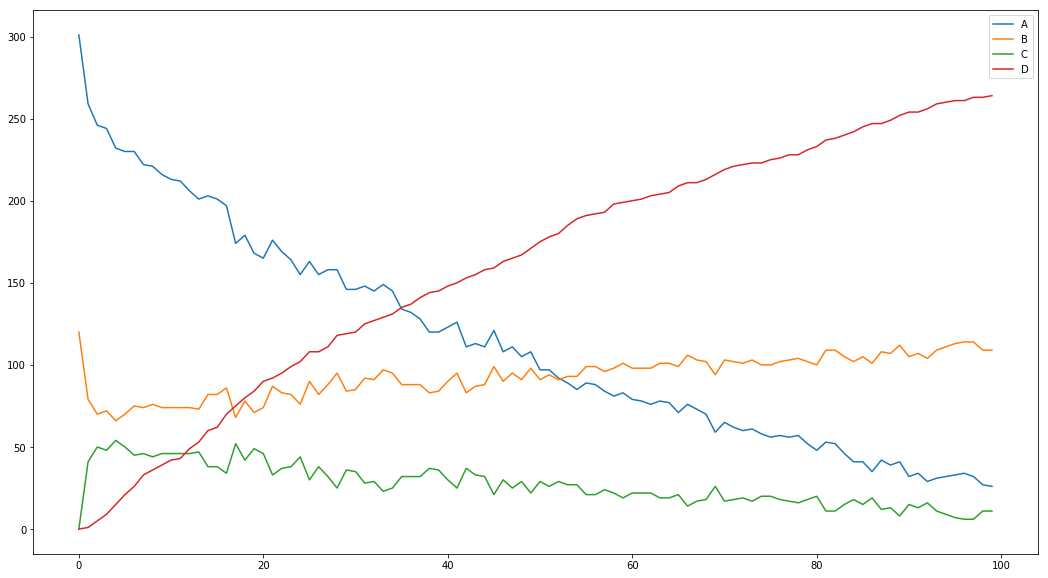

In [8]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['B'], label='B')
plt.plot(results['time'], results['C'], label='C')
plt.plot(results['time'], results['D'], label='D')
plt.legend(loc='best')


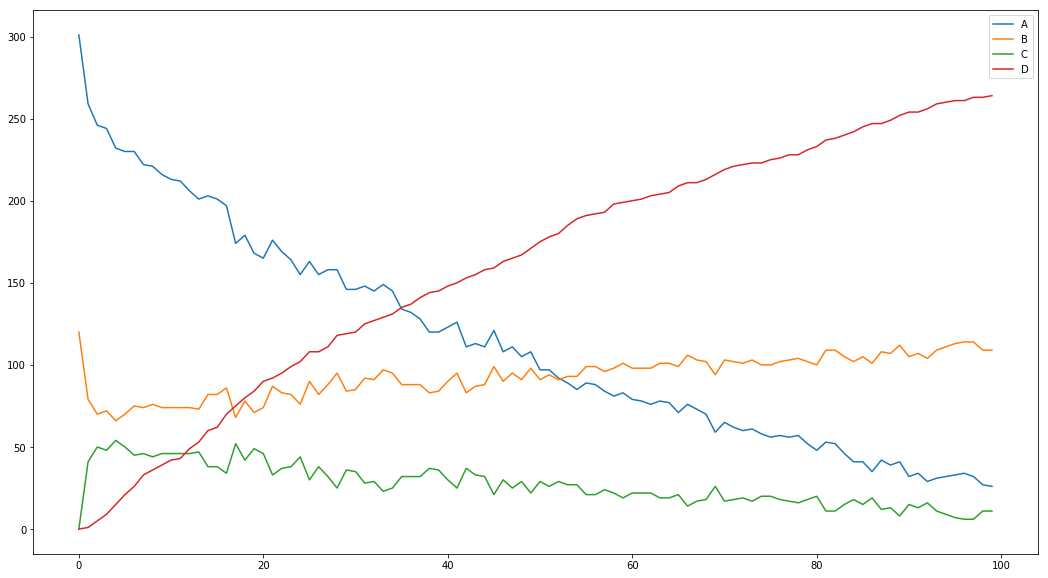

In [9]:
plt.figure(figsize=(18,10))
plt.plot(results2['time'], results['A'], label='A')
plt.plot(results2['time'], results['B'], label='B')
plt.plot(results2['time'], results['C'], label='C')
plt.plot(results2['time'], results['D'], label='D')
plt.legend(loc='best')

TODO:
if profile = true:
Add debugging information to display step sizes and steps rejected
(append every step to an array)
plot over time and histogram
prop * tau = mean, feed to poisson random number